# Plotting multispectral data

Multispectral data can be plotted as:

1.  Individual bands
2.  Spectral indices
3.  True color 3-band images
4.  False color 3-band images

Spectral indices and false color images can both be used to enhance
images to clearly show things that might be hidden from a true color
image, such as vegetation health.

In [1]:
%store -r band_dict denver_ndvi_da denver_ndmi_da denver_redlining_gdf

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Import libraries</div></div><div class="callout-body-container callout-body"><p>Add missing libraries to the imports</p></div></div>

In [ ]:
import cartopy.crs as ccrs # CRSs
# Interactive tabular and vector data
import hvplot.xarray # Interactive raster
import hvplot.pandas
# Overlay plots
import numpy as np # Adjust images
import xarray as xr # Adjust images
import matplotlib.pyplot as plt #overlay plots


There are many different ways to represent geospatial coordinates,
either spherically or on a flat map. These different systems are called
Coordinate Reference Systems.

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Prepare to plot</div></div><div class="callout-body-container callout-body"><p>To make interactive geospatial plots, at the moment we need
everything to be in the Mercator CRS.</p>
<ol type="1">
<li>Reproject your area of interest with
<code>.to_crs(ccrs.Mercator())</code></li>
<li>Reproject your NDVI and band raster data using
`.rio.reproject(ccrs.Mercator())</li>
</ol></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot raster with overlay with xarray</div></div><div class="callout-body-container callout-body"><p>Plotting raster and vector data together using <code>pandas</code>
and <code>xarray</code> requires the <code>matplotlib.pyplot</code>
library to access some plot layour tools. Using the code below as a
starting point, you can play around with adding:</p>
<ol type="1">
<li>Labels and titles</li>
<li>Different colors with <code>cmap</code> and
<code>edgecolor</code></li>
<li>Different line thickness with <code>line_width</code></li>
</ol>
<p>See if you can also figure out what <code>vmin</code>,
<code>robust</code>, and the <code>.set()</code> methods do.</p></div></div>

In [3]:
#proj_redlining_gdf = denver_redlining_gdf.to_crs(ccrs.Mercator())
#proj_ndvi_da = denver_ndvi_da.rio.reproject(ccrs.Mercator())

In [4]:

#area of interest needs to reproject to mercator
denver_proj_aoi_gdf = denver_redlining_gdf.to_crs(ccrs.Mercator())
#reproject ndvi to mercator
denver_proj_ndvi_da = denver_ndvi_da.rio.reproject(ccrs.Mercator())
#reproject bands
denver_proj_band_dict = {
    name: da.rio.reproject(ccrs.Mercator())
    for name, da in band_dict.items()
}



In [ ]:
denver_proj_ndvi_da.plot(vmin=0, robust=True)

denver_proj_aoi_gdf.plot(ax=plt.gca(), edgecolor='red', color='none')
plt.gca().set(
      xlabel='', ylabel='', xticks=[], yticks=[]
 )

plt.show()

In [6]:
# #alternate version from chatgpt
# import matplotlib.pyplot as plt
# import cartopy.crs as ccrs

# # Plot the reprojected NDVI (raster)
# fig, ax = plt.subplots(
#     figsize=(7, 7), 
#     subplot_kw={'projection': ccrs.Mercator()}
# )

# # Plot the NDVI data in Mercator projection
# denver_proj_ndvi_da.plot(
#     ax=ax, 
#     vmin=0, 
#     robust=True, 
#     cmap='Greens',  # Optional: set a colormap for the NDVI
#     transform=ccrs.Mercator()  # Apply Mercator transformation to the raster
# )

# # Plot the reprojected area of interest (AOI)
# denver_proj_aoi_gdf.plot(
#     ax=ax, 
#     color='none',  # Only show the boundaries of the AOI
#     edgecolor='red',  # Set the color of the boundary
#     linewidth=1,  # Set line thickness for better visibility
#     transform=ccrs.Mercator()  # Apply Mercator transformation to the vector
# )

# # Adjust plot aesthetics
# plt.gca().set(
#     xlabel='', 
#     ylabel='', 
#     xticks=[], 
#     yticks=[]
# )

# # Set a title (optional)
# ax.set_title("Denver", fontsize=16)

# # Show the plot
# plt.show()

In [ ]:
#another chatgpt pass
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Reproject the AOI (GeoDataFrame) to Mercator using EPSG:3857
denver_proj_aoi_gdf = denver_redlining_gdf.to_crs(epsg=3857)  # EPSG:3857 is the code for Web Mercator

# Reproject the NDVI data to Mercator using cartopy's Mercator CRS
denver_proj_ndvi_da = denver_ndvi_da.rio.reproject(ccrs.Mercator().proj4_init)

# Plot the reprojected NDVI and AOI using cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.Mercator()})

# Plot the reprojected NDVI raster data
denver_proj_ndvi_da.plot(ax=ax, vmin=0, robust=True, cmap='Greens', transform=ccrs.Mercator())

# Plot the reprojected AOI (vector data) on top
denver_proj_aoi_gdf.plot(ax=ax, color='none', edgecolor='red', linewidth=2, transform=ccrs.Mercator())

# Add any additional cartopy features (optional)
ax.coastlines()

# Adjust plot aesthetics
plt.gca().set(
    xlabel='', ylabel='', xticks=[], yticks=[]
)

plt.show()


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot raster with overlay with hvplot</div></div><div class="callout-body-container callout-body"><p>Now, do the same with <code>hvplot</code>. Note that some parameter
names are the same and some are different. Do you notice any physical
lines in the NDVI data that line up with the redlining boundaries?</p></div></div>

In [ ]:
(
    denver_proj_ndvi_da.hvplot(
        geo=True,
        xaxis=None, yaxis=None
    )
    * denver_proj_aoi_gdf.hvplot(
        geo=True, crs=ccrs.Mercator(),
        fill_color=None)
)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot bands with linked subplots</div></div><div class="callout-body-container callout-body"><p>The following code will make a three panel plot with Red, NIR, and
Green bands. Why do you think we aren’t using the green band to look at
vegetation?</p></div></div>

In [9]:
raster_kwargs = dict(
    geo=True, robust=True, 
    xaxis=None, yaxis=None
)
(
    (
        denver_proj_band_dict['red'].hvplot(
            cmap='Reds', title='Red Reflectance', **raster_kwargs)
        + denver_proj_band_dict['nir'].hvplot(
            cmap='Greys', title='NIR Reflectance', **raster_kwargs)
        + denver_proj_band_dict['green'].hvplot(
            cmap='Greens', title='Green Reflectance', **raster_kwargs)
    )
    * denver_proj_aoi_gdf.hvplot(
        geo=True, crs=ccrs.Mercator(),
        fill_color=None)
)

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot RBG</div></div><div class="callout-body-container callout-body"><p>The following code will plot an RGB image using both matplotlib and
hvplot. It also performs an action called “Contrast stretching”, and
brightens the image.</p>
<ol type="1">
<li>Read through the <code>stretch_rgb</code> function, and fill out the
<strong>docstring</strong> with the rest of the parameters and your own
descriptions. You can ask ChatGPT or another LLM to help you read the
code if needed! Please use the <a
href="https://numpydoc.readthedocs.io/en/latest/format.html">numpy style
of docstrings</a></li>
<li>Adjust the <code>low</code>, <code>high</code>, and
<code>brighten</code> numbers until you are satisfied with the image.
You can also ask ChatGPT to help you figure out what adjustments to make
by describing or uploading an image.</li>
</ol></div></div>

:RGB   [x,y]   (R,G,B)

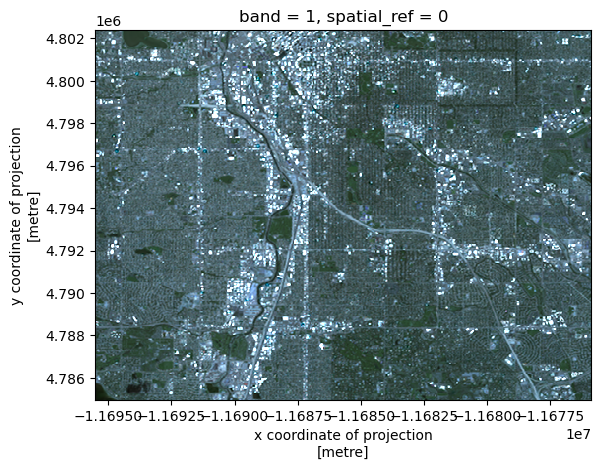

In [10]:
rgb_da = (
    xr.concat(
        [
            denver_proj_band_dict['red'],
            denver_proj_band_dict['green'],
            denver_proj_band_dict['blue']
        ],
        dim='rgb')
)

def stretch_rgb(rgb_da, low, high, brighten):
    """
    Summary
    This function adjusts a visual spectrum image (red, green, blue)
    by applying a contrast stretch

    Details
    Adjustment is done by specifying percentile thresholds for the lower and upper bounds 
    of the pixel intensity values, which enhances image, especially for data with a 
    wide dynamic range. Additionally, the function can "brighten" the image by adding 
    a specified value to all pixels after the stretch.

    Parameters
    ----------
    rgb_da: array-like
      set of red green blue values selected from multispectral collection
    low:
     the low percentile threshold for a given band value to clip or stretch
    high:
      the high percentile threshold for a given band value to clip or stretch
      brighten (float): A value added to all pixel intensities after the stretch 
      to uniformly increase the brightness of the image. 
      This value should be relatively small (e.g., 0.01 or 0.1) 
      to avoid over-brightening the image.

    Returns
    -------
    rgb_da: array-like
      adjusted array for visualization
    """
    p_low, p_high = np.nanpercentile(rgb_da, (low, high))
    rgb_da = (rgb_da - p_low)  / (p_high - p_low) + brighten
    rgb_da = rgb_da.clip(0, 1)
    return rgb_da

#original
# rgb_da = stretch_rgb(rgb_da, 1, 99, .01) 
#test
rgb_da = stretch_rgb(rgb_da, 1, 99, .15) 


rgb_da.plot.imshow(rgb='rgb')
rgb_da.hvplot.rgb(geo=True, x='x', y='y', bands='rgb')

In [11]:
help(stretch_rgb)



Help on function stretch_rgb in module __main__:

stretch_rgb(rgb_da, low, high, brighten)
    Summary
    This function adjusts a visual spectrum image (red, green, blue)
    by applying a contrast stretch
    
    Details
    Adjustment is done by specifying percentile thresholds for the lower and upper bounds 
    of the pixel intensity values, which enhances image, especially for data with a 
    wide dynamic range. Additionally, the function can "brighten" the image by adding 
    a specified value to all pixels after the stretch.
    
    Parameters
    ----------
    rgb_da: array-like
      set of red green blue values selected from multispectral collection
    low:
     the low percentile threshold for a given band value to clip or stretch
    high:
      the high percentile threshold for a given band value to clip or stretch
      brighten (float): A value added to all pixel intensities after the stretch 
      to uniformly increase the brightness of the image. 
      This va

In [12]:
%store denver_proj_aoi_gdf

Stored 'denver_proj_aoi_gdf' (GeoDataFrame)


<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot CIR</div></div><div class="callout-body-container callout-body"><p>Now, plot a false color RGB image. CIR images have the following
bands:</p>
<ul>
<li>red becomes NIR</li>
<li>green becomes red</li>
<li>blue becomes green</li>
</ul></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?: Adjust the levels</div></div><div class="callout-body-container callout-body"><p>You may notice that the NIR band in this image is very bright. Can
you adjust it so it is balanced more effectively by the other bands?</p></div></div>

:RGB   [x,y]   (R,G,B)

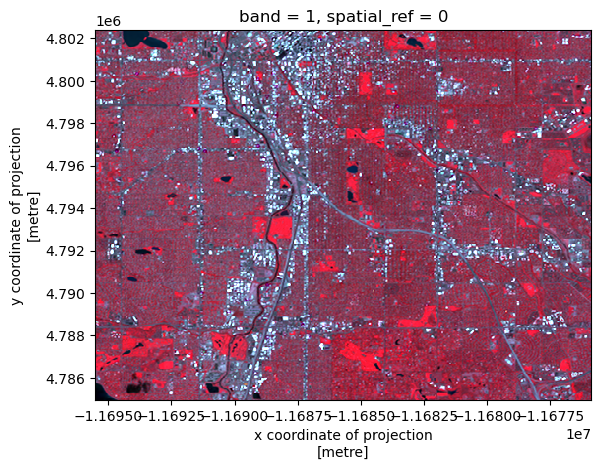

In [13]:
cir_da = (
    xr.concat(
        [
            # now set for CIR
            denver_proj_band_dict['nir'] * .5,  # more typical
            denver_proj_band_dict['red'],
            denver_proj_band_dict['green']
        ],
        dim='rgb')
)

cir_da = stretch_rgb(cir_da, 1, 99, .1) 


cir_da.plot.imshow(rgb='rgb')
cir_da.hvplot.rgb(geo=True, x='x', y='y', bands='rgb')